FIRST
Loop through the first day's training set and each of the 9 test sets. Each test set includes one day of data for days 2 through 10. Therefore all 10 days of data are examined.

Each day includes data for 5 stocks sequentially.
For each day determine the number of records for that day and the number of records for each of the five stocks.
Find the breaks between stocks by looking for a difference large enough to partition the data into 5 sections.

SECOND
For the first stock on the first training day, plot all 144 fields broken out by categories v1-v9 in Kercheval's paper.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [7]:
testdirectory="data/FI-2010/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/"
traindirectory="data/FI-2010/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Training/"


In [8]:
f=[testdirectory+"Test_Dst_NoAuction_DecPre_CF_%d.txt" % (i+1) for i in range(9)]
f.insert(0,traindirectory+"Train_Dst_NoAuction_DecPre_CF_1.txt")

In [9]:
f

['data/FI-2010/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Training/Train_Dst_NoAuction_DecPre_CF_1.txt',
 'data/FI-2010/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_1.txt',
 'data/FI-2010/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_2.txt',
 'data/FI-2010/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_3.txt',
 'data/FI-2010/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_4.txt',
 'data/FI-2010/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_5.txt',
 'data/FI-2010/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_6.txt',
 'data/FI-2010/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_7.txt',
 'data

In [33]:
f = [
    'data/FI-2010/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Training/Train_Dst_NoAuction_DecPre_CF_7.txt'
]

In [34]:
def get_info(d):
    #find the index of the breaks between tickers (b)
    i=np.arange(d.shape[1])
    b=i[d.iloc[0].diff().abs()>0.01]
    b=np.append(b,d.shape[1])
    return b
    

data/FI-2010/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Training/Train_Dst_NoAuction_DecPre_CF_7.txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Columns: 254750 entries, 0 to 254749
dtypes: float64(254750)
memory usage: 289.6 MB
[array([ 23336,  68210, 106759, 161434, 254750])]


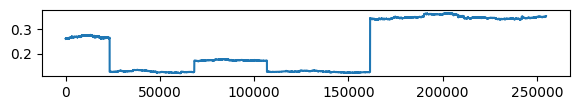

In [35]:
dat=[]
fig=plt.figure(figsize=(15,5))
for i,j in enumerate(f):
    print(j)
    d=pd.read_fwf(j,header=None)
    d.info()
    dat.append(get_info(d))
    print(dat)
    plt.subplot(5,2,i+1)
    d.iloc[0].plot()

In [36]:
 dat

[array([ 23336,  68210, 106759, 161434, 254750])]

In [38]:
mat=np.array(dat)
#matdiff=np.diff(np.c_[np.zeros(10),mat])
matdiff=np.diff(np.c_[np.zeros(1),mat])

In [39]:
matdiff

array([[23336., 44874., 38549., 54675., 93316.]])

In [40]:
np.sum(matdiff,axis=0)

array([23336., 44874., 38549., 54675., 93316.])

In [41]:
np.sum(matdiff)

254750.0

In [42]:
np.sum(mat,axis=0)

array([ 23336,  68210, 106759, 161434, 254750])

In [43]:
mat

array([[ 23336,  68210, 106759, 161434, 254750]])

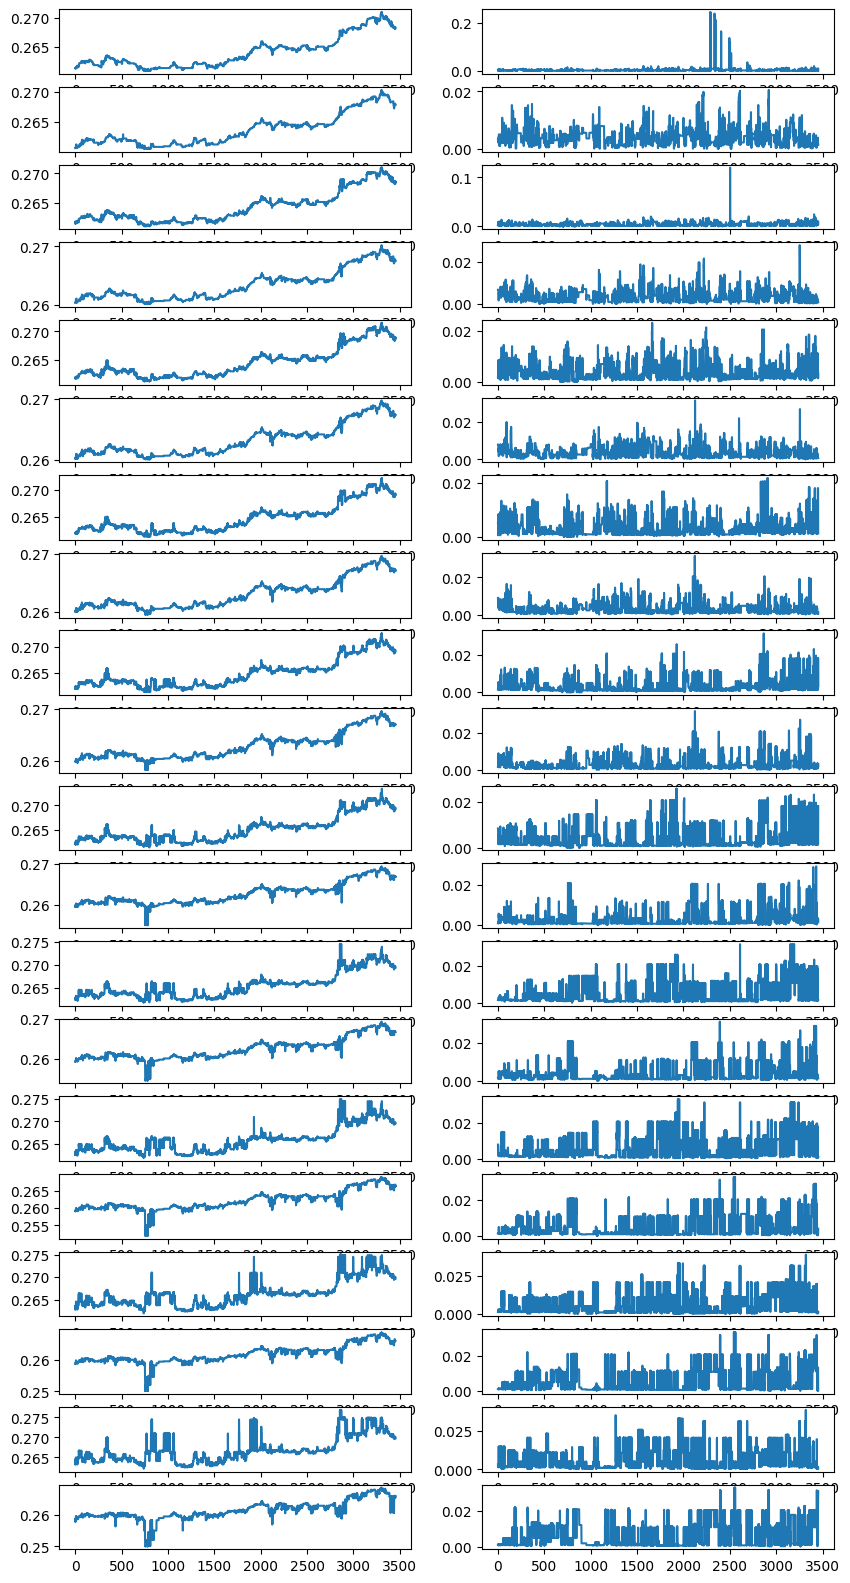

In [45]:
# read first day's data and plot price and volume for first stock
d=pd.read_fwf(f[0],header=None)
#  - price/vol
fig=plt.figure(figsize=(10,20))
for i in range(40):
    plt.subplot(20,2,i+1)
    d.iloc[i,:3454].plot()

<Axes: >

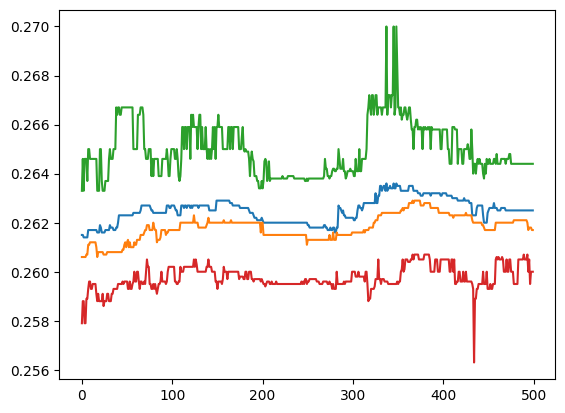

In [55]:
#  Plot inside and outside price bid and offer levels
d.iloc[0,:500].plot()
d.iloc[2,:500].plot()
d.iloc[36,:500].plot()
d.iloc[38,:500].plot()

### Plot all data for the first stock on the first training day in each of the 9 categories in the Kercheval paper

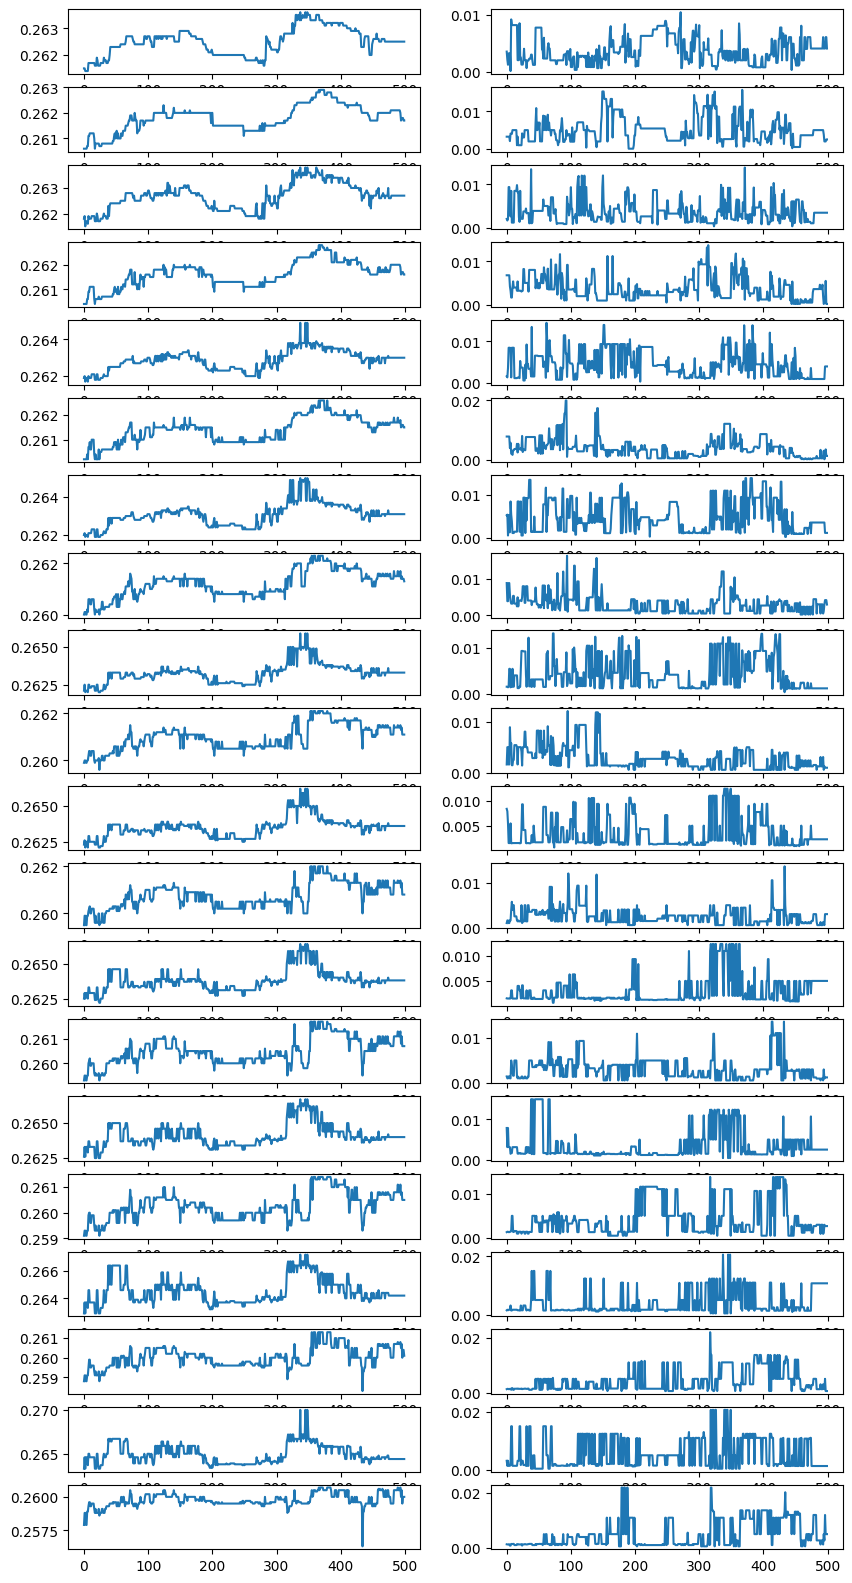

In [56]:
#v1 - pask,vask,pbid,vbid (1-40)
fig=plt.figure(figsize=(10,20))
for i in range(40):
    plt.subplot(20,2,i+1)
    d.iloc[i,:500].plot()

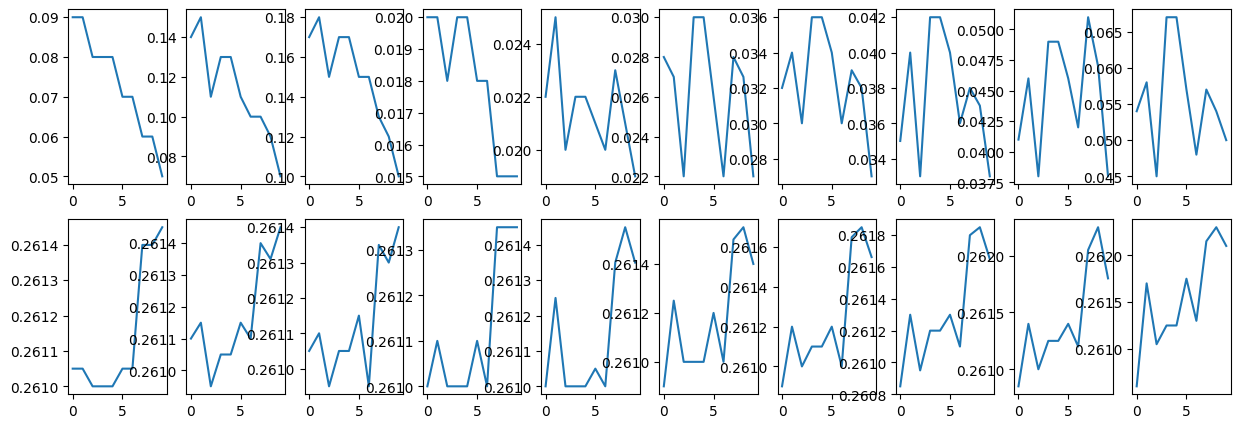

In [59]:
#v2 - spread and mid (41-60)
plt.figure(figsize=(15,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    d.iloc[i+40,:10].plot()

In [60]:
d.iloc[50, :50]

0     0.26105
1     0.26105
2     0.26100
3     0.26100
4     0.26100
5     0.26105
6     0.26105
7     0.26140
8     0.26140
9     0.26145
10    0.26145
11    0.26145
12    0.26145
13    0.26145
14    0.26145
15    0.26145
16    0.26135
17    0.26110
18    0.26120
19    0.26120
20    0.26135
21    0.26130
22    0.26120
23    0.26120
24    0.26115
25    0.26115
26    0.26120
27    0.26120
28    0.26125
29    0.26125
30    0.26125
31    0.26135
32    0.26130
33    0.26130
34    0.26130
35    0.26125
36    0.26125
37    0.26125
38    0.26130
39    0.26130
40    0.26140
41    0.26155
42    0.26155
43    0.26155
44    0.26155
45    0.26160
46    0.26160
47    0.26170
48    0.26175
49    0.26165
Name: 50, dtype: float64

In [53]:
d.iloc[41, 100:120]

100    0.13
101    0.13
102    0.12
103    0.12
104    0.11
105    0.11
106    0.11
107    0.10
108    0.10
109    0.08
110    0.10
111    0.10
112    0.10
113    0.09
114    0.10
115    0.10
116    0.09
117    0.10
118    0.10
119    0.10
Name: 41, dtype: float64

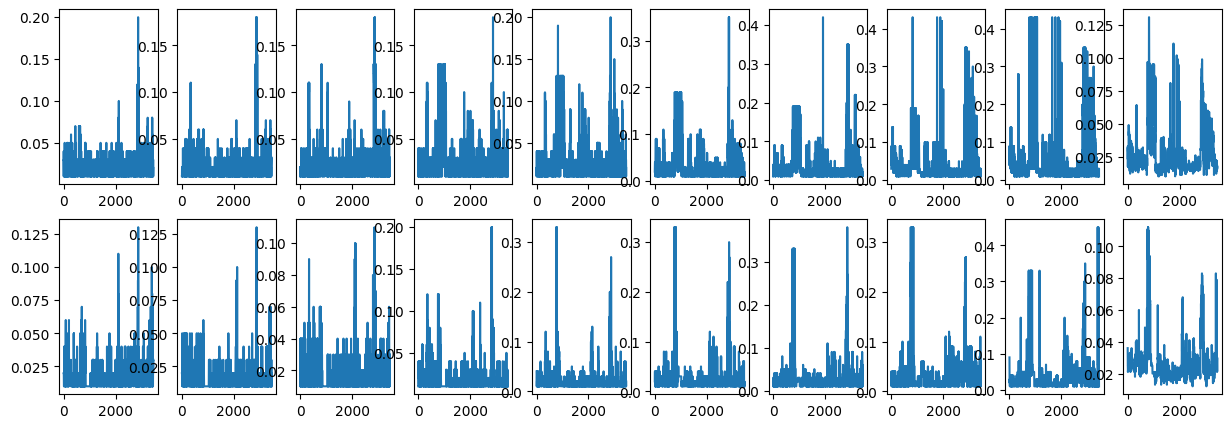

In [49]:
#v3 - pask(10-1),pbid(10-1), pask(i+1)-pask(i),pbid(i+1)-pbid(i) (61-80)
plt.figure(figsize=(15,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    d.iloc[i+60,:3454].plot()

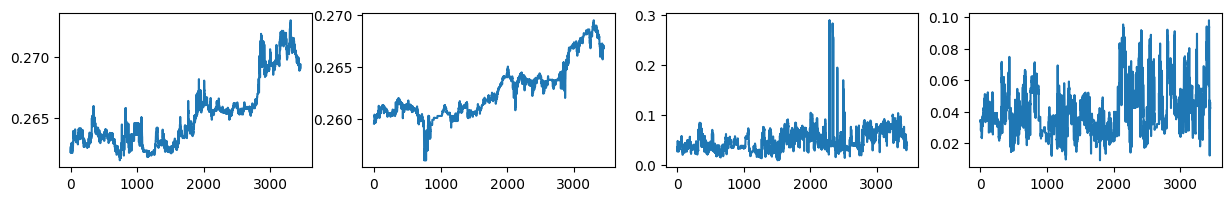

In [50]:
#v4 - mean pask, mean pbid, mean vask, mean vbid(81-84)
plt.figure(figsize=(15,2))
for i in range(4):
    plt.subplot(1,4,i+1)
    d.iloc[i+80,:3454].plot()

In [ ]:
d.iloc[

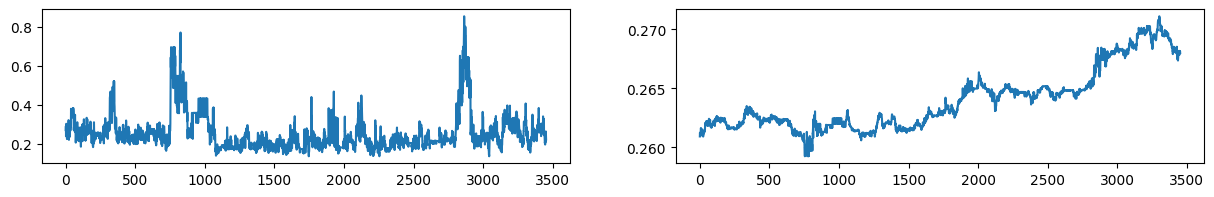

In [27]:
#v5 - sum pask-pbid, sum vask-vbid (85-86)
plt.figure(figsize=(15,2))
for i in range(2):
    plt.subplot(1,2,i+1)
    d.iloc[i+84,:3454].plot()

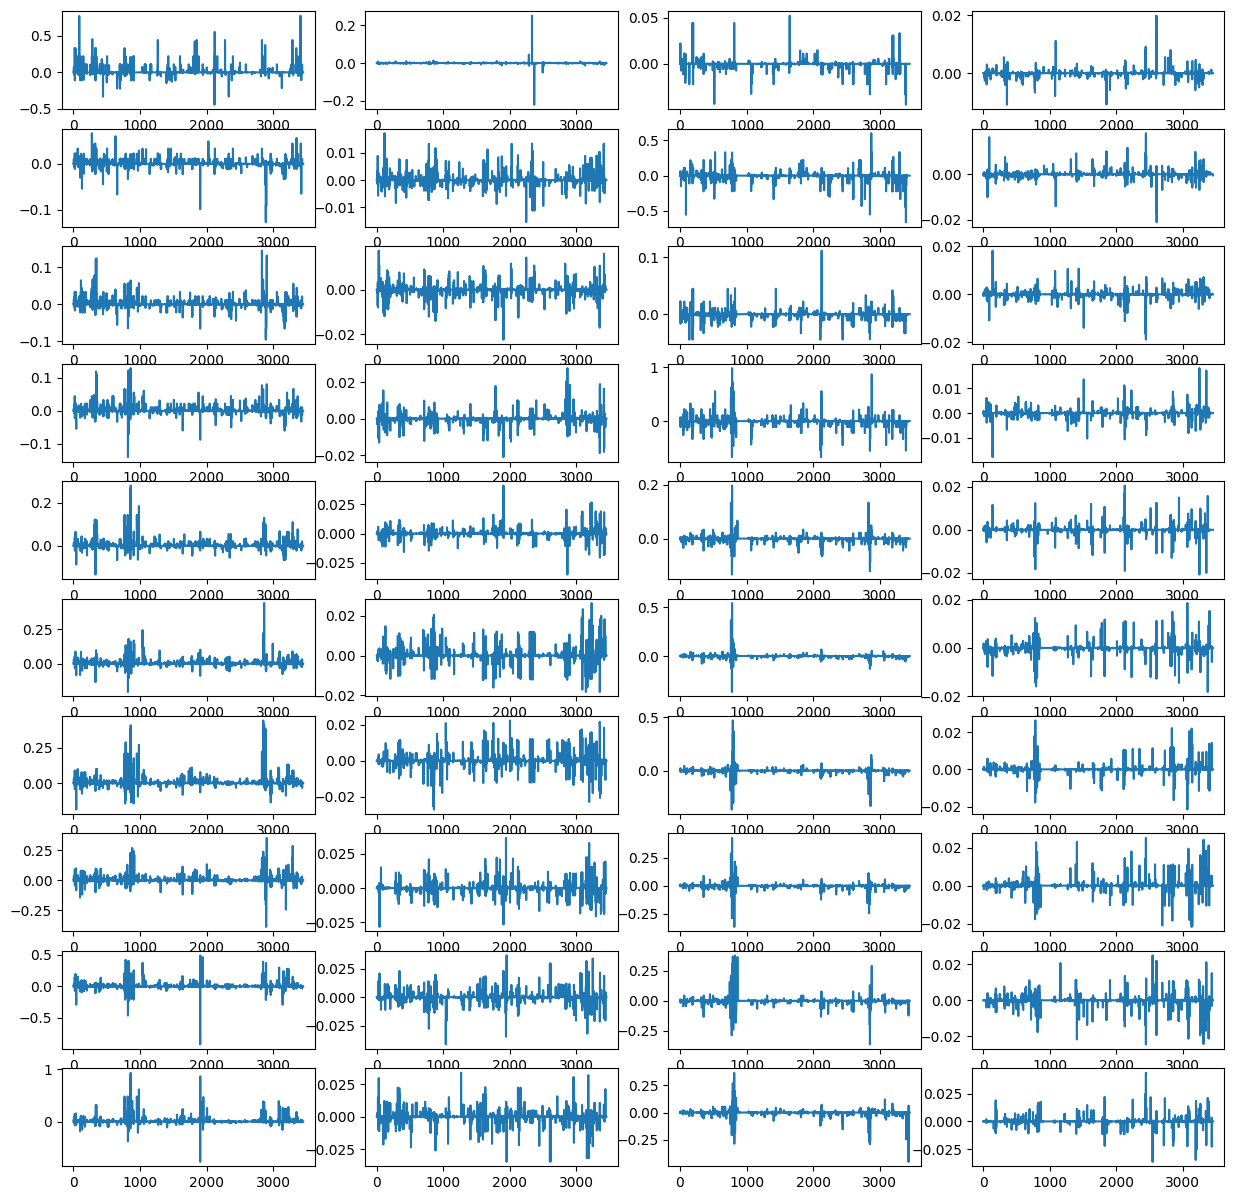

In [28]:
#v6 - pask,vask,pbid,vbid (87-126)
plt.figure(figsize=(15,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    d.iloc[i+86,:3454].plot()

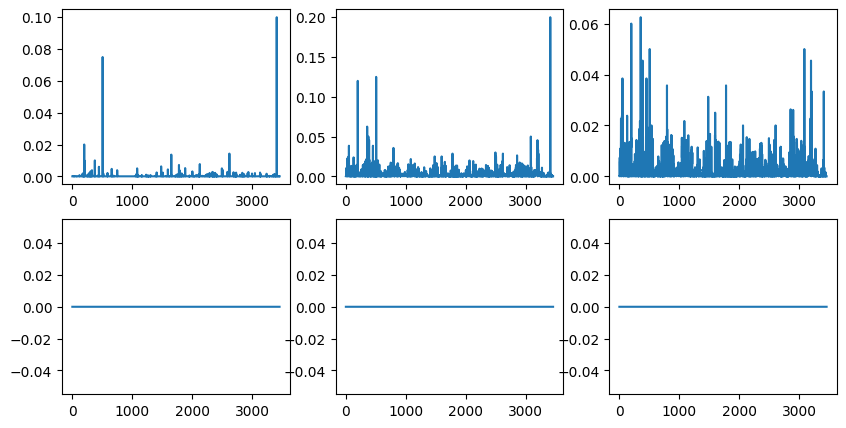

In [29]:
#v7- average intensity for 6 categories (127-132)
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    d.iloc[i+126,:3454].plot()

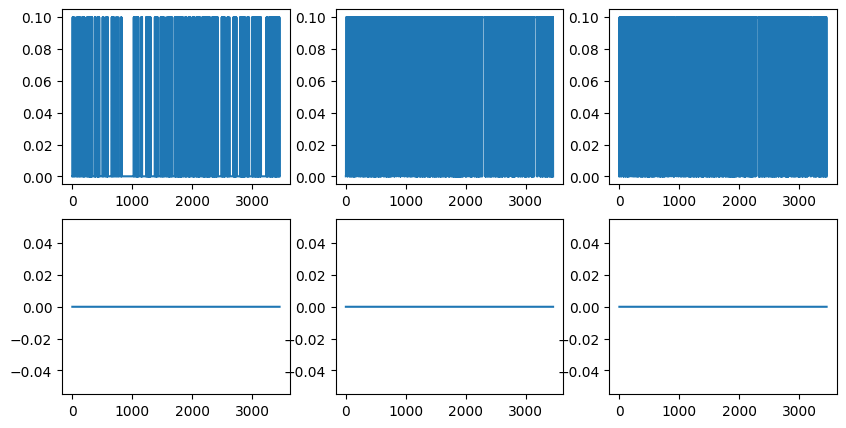

In [30]:
#v8- relative intensity for 6 categories (133-138)
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    d.iloc[i+132,:3454].plot()

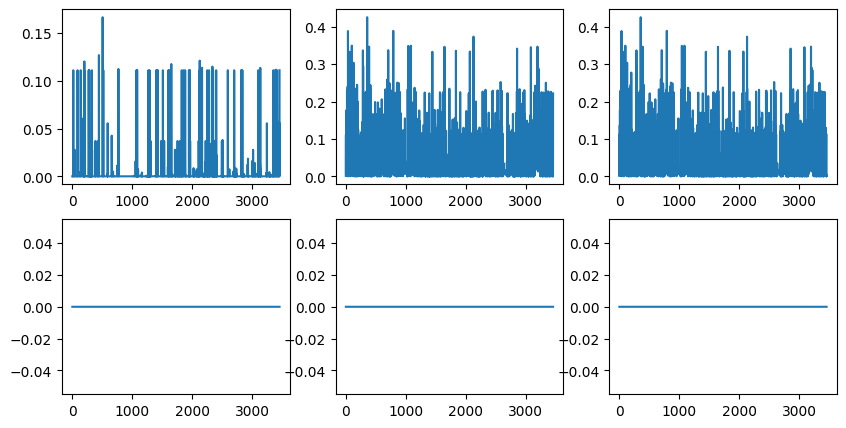

In [31]:
#v8- acceleration for 6 categories (139-144)
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    d.iloc[i+138,:3454].plot()

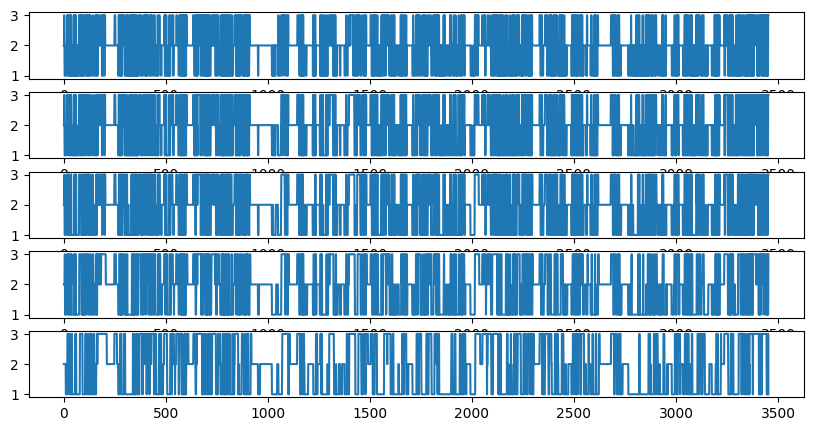

In [32]:
#forecast (1,2,3,5,10) (145-149)
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(5,1,i+1)
    d.iloc[i+144,:3454].plot()